In [1]:
#Import basic libraries
#import spc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal
from sklearn.decomposition import PCA
from pyspectra.readers.read_spc import read_spc
from pyspectra.readers.read_spc import read_spc_dir
from sklearn.model_selection import train_test_split

import ipywidgets as widgets

df_spc, dict_spc=read_spc_dir(r"C:\Users\jhuang\Documents\Python Scripts\combined spectra", )




gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)
gx-y(1)


In [2]:
##lets build a widget. input dropdown select waveform. output visualize spectra and text.

def spectra_viz(m,text=""):
    num_spectra=len(m)
    f, ax =plt.subplots(1, figsize=(18,8))
    #print(m)
    #print(num_spectra)
    for i in range(num_spectra):
        #print(i)
        ax.plot(df_spc.iloc[i,:],label=m[i])
    plt.legend()
    plt.xlabel("nm")
    plt.ylabel("Abs")
def spectra_viz_normalized(m,text=""):
    num_spectra=len(m)
    f, ax =plt.subplots(1, figsize=(18,8))
    #print(m)
    #print(num_spectra)
    for i in range(num_spectra):
        #print(i)
        ax.plot(df_out.iloc[i,:],label=m[i])
    plt.legend()
    plt.xlabel("nm")
    plt.ylabel("Abs")
listnames=df_spc.index.values.tolist()
colnames=df_spc.columns.values.tolist()

# def spectra_viz(m,text=""):
#     f, ax =plt.subplots(1, figsize=(18,8))
#     ax.plot(df_spc.loc[m,:])
#     plt.xlabel("nm")
#     plt.ylabel("Abs")
# listnames=df_spc.index.values.tolist()

#widgets.interact(spectra_viz,m=listnames);
spec_choice=widgets.SelectMultiple(
    options=listnames,
    value=[listnames[0]],
    #rows=10,
    description='Spectra',
    rows=10,
    layout=widgets.Layout(width="100%"),
    disabled=False
)
widgets.interact(spectra_viz,m=spec_choice);


interactive(children=(SelectMultiple(description='Spectra', index=(0,), layout=Layout(width='100%'), options=(…

In [131]:
def preprocessing1(df):  #savgol filter 1st derivative, SNV
    wl=51
    Zn = signal.savgol_filter(df, window_length=wl, polyorder=4, deriv=1)
    df_out=pd.DataFrame(data=Zn,index=listnames,columns=colnames) 
    df_out.iloc[:,:] = df_out.iloc[:,:].apply(lambda x: (x-x.mean())/ x.std(), axis=1)
    return df_out
def preprocessing2(df):
    df_out.iloc[:,:] = df.iloc[:,:].apply(lambda x: (x-x.mean())/ x.std(), axis=1)
    return df_out
df_preprocessing=df_spc.copy()
df_out=preprocessing1(df_preprocessing)
widgets.interact(spectra_viz_normalized,m=spec_choice);

interactive(children=(SelectMultiple(description='Spectra', index=(7,), layout=Layout(width='100%'), options=(…

In [13]:
#manipulate and reduce variables.
#make sure its one spectra per spc file and not multiple spectra in spc. if so need to split.

df_out['File_Name'] = df_out.index
df_offline=pd.read_excel("Raman offline measurements.xlsx",sheet_name="Reference Val")
df_combined=df_offline.merge(df_out,how="left",left_on="File Name",right_on="File_Name")
df_combined=df_combined.drop(columns=['File_Name'])
df_combined=df_combined.dropna()
df_combined["Solution A"]=df_combined["Solution A"].astype(int)
df_combined=df_combined.rename(columns={"Titer (mg/mL)": "y_actual"})
df_combined.head(5)



,File Name,y_actual,Solution A,100.0,101.0,102.0,103.0,104.0,105.0,106.0,...,3416.0,3417.0,3418.0,3419.0,3420.0,3421.0,3422.0,3423.0,3424.0,3425.0
0,210923 run 1_20210923-093305_CONFIDENTIAL.spc,0.003471,1,15.307027,13.507272,11.830058,10.271342,8.827081,7.493231,6.265750,...,1.751462,1.719282,1.677910,1.627040,1.566362,1.495571,1.414359,1.322419,1.219444,1.105126
1,210923 run 1_20210923-110303_CONFIDENTIAL.spc,0.105501,1,15.585759,13.739945,12.020814,10.424165,8.945796,7.581503,6.327085,...,1.819674,1.769748,1.704786,1.624068,1.526875,1.412489,1.280190,1.129261,0.958980,0.768631
2,210923 run 1_20210923-131803_CONFIDENTIAL.spc,0.216834,1,15.297948,13.505995,11.836230,10.284617,8.847120,7.519704,6.298333,...,1.998736,1.952977,1.891670,1.814064,1.719411,1.606960,1.475961,1.325664,1.155318,0.964175
3,210923 run 1_20210923-150303_CONFIDENTIAL.spc,0.301073,1,14.827952,13.135521,11.558167,10.092066,8.733394,7.478328,6.323044,...,1.862308,1.798860,1.720596,1.626922,1.517246,1.390976,1.247518,1.086281,0.906671,0.708096
4,210923 run 1_20210923-161803_CONFIDENTIAL.spc,0.330496,1,14.942307,13.236270,11.646490,10.169096,8.800218,7.535985,6.372525,...,1.911492,1.841061,1.753991,1.649554,1.527024,1.385673,1.224775,1.043604,0.841431,0.617530


In [17]:
#split between training and test sets. 

#regression on all, testing on all
#regression on 1, testing on 1, regression on 2,3,4 testing on 2,3,4 (liquid vs spray dried extract)
#regression on individual

def partition_all(df_combined):  #shuffle and partition data
    X=df_combined.iloc[:,3:]
    y=df_combined.iloc[:,1]
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)#Build model on training. calculate RMSE, and RMSECV. What are tuning parameters? # of latent variables or PC
    
    print("X train size: {}".format(X_train.shape))
    print("X test size: {}".format(X_test.shape))
    print("y train size: {}".format(y_train.shape))
    print("y test size: {}".format(y_test.shape))
    return [[X_train, X_test, y_train, y_test]]

def partition_indiv(df_combined):  #shuffle and partition data
    plist=[]
    for i in range(1,5):  #gor number of groups
        print(i)
        dff=df_combined.copy()
        dff=dff.loc[dff['Solution A'] == i]
        X=dff.iloc[:,3:]
        y=dff.iloc[:,1]
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)#Build model on training. calculate RMSE, and RMSECV. What are tuning parameters? # of latent variables or PC
        print("X train size: {}".format(X_train.shape))
        print("X test size: {}".format(X_test.shape))
        print("y train size: {}".format(y_train.shape))
        print("y test size: {}".format(y_test.shape))
        plist.append([X_train, X_test, y_train, y_test])
    return plist

def partition_phase(df_combined):  #shuffle and partition data
    plist=[]
    dff=df_combined.copy()
    
    dff=dff.loc[dff['Solution A'] == 1]
    X=dff.iloc[:,3:]
    y=dff.iloc[:,1]
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)#Build model on training. calculate RMSE, and RMSECV. What are tuning parameters? # of latent variables or PC
    print("X train size: {}".format(X_train.shape))
    print("X test size: {}".format(X_test.shape))
    print("y train size: {}".format(y_train.shape))
    print("y test size: {}".format(y_test.shape))
    plist.append([X_train, X_test, y_train, y_test])
    
    dff=df_combined.copy()
    dff=dff.loc[dff['Solution A'] != 1]
    X=dff.iloc[:,3:]
    y=dff.iloc[:,1]
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)#Build model on training. calculate RMSE, and RMSECV. What are tuning parameters? # of latent variables or PC
    print("X train size: {}".format(X_train.shape))
    print("X test size: {}".format(X_test.shape))
    print("y train size: {}".format(y_train.shape))
    print("y test size: {}".format(y_test.shape))
    plist.append([X_train, X_test, y_train, y_test])
    return plist


from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import RepeatedKFold
from sklearn import model_selection
from sklearn.metrics import mean_squared_error

def CV_MSE(a):
    X_train=a[0]
    X_test=a[1]
    y_train=a[2]
    y_test=a[3]
    mse = []
    R_squared=[]
    n = len(X_train)
    # Calculate MSE with only the intercept
    #score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
    #             np.ones((n,1)), y_train, cv=cv, scoring='neg_mean_squared_error')    
    #Calculate MSE using cross-validation, adding one component at a time
    cv = RepeatedKFold(n_splits=n, n_repeats=1, random_state=1)  #loocv is more stable but takes longer
    for i in np.arange(1, 10):
        pls = PLSRegression(n_components=i)
        score = -1*model_selection.cross_val_score(pls, X_train, y_train, cv=cv, scoring='neg_mean_squared_error').mean()
        #variance = model_selection.cross_val_score(pls, X_train, y_train, cv=cv, scoring='r2').mean()
        mse.append(score)
        #R_squared.append(variance)
        MSE=[]
    for i in np.arange(1, 10):
        n_comp=i  #no CV, there seems to be good drop at at 6 components.
        pls2 = PLSRegression(n_components=n_comp)
        pls2.fit(X_train, y_train)
        y_pred = pls2.predict(X_train).flatten()
        m=len(y_train)
        MSE.append(np.sum((y_pred-y_train)**2)/m)
    plt.figure()
    plt.plot(mse,label="CV mse")
    plt.plot(MSE,label="mse")
    plt.xlabel('Number of PLS Components')
    plt.ylabel('MSE')
    plt.legend()
    plt.show()
    


#     plt.figure()
#     plt.plot(R_squared,label="CV")

#     plt.xlabel('Number of PLS Components')
#     plt.ylabel('% Variance Explained')
#     plt.legend()


#cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=1)  #play around with this.
#cv = RepeatedKFold(n_splits=5, n_repeats=1, random_state=1)

a=partition_all(df_combined)
# CV_MSE(a[0])


b=partition_indiv(df_combined)
# for i in range(len(b)):
#     print("for Lot number: {}".format(i+1))
#     CV_MSE(b[i])
    
c=partition_phase(df_combined)
# for i in range(len(c)):
#     print("for Lot number: {}".format(i+1))
#     CV_MSE(c[i])

1
X train size: (16, 3326)
X test size: (4, 3326)
y train size: (16,)
y test size: (4,)
2
X train size: (28, 3326)
X test size: (8, 3326)
y train size: (28,)
y test size: (8,)
3
X train size: (17, 3326)
X test size: (5, 3326)
y train size: (17,)
y test size: (5,)
4
X train size: (18, 3326)
X test size: (5, 3326)
y train size: (18,)
y test size: (5,)
X train size: (16, 3326)
X test size: (4, 3326)
y train size: (16,)
y test size: (4,)
X train size: (64, 3326)
X test size: (17, 3326)
y train size: (64,)
y test size: (17,)


In [93]:
#plotly for interactive graphs of predictions
import plotly.express as px
import plotly.graph_objects as go

def pred_plotly(plist):
    df_out = pd.DataFrame()
    for i in range(len(plist)):
        print("group: {}".format(i+1))
        X_train=plist[i][0]
        X_test=plist[i][1]
        y_train=plist[i][2]
        y_test=plist[i][3]

        pls = PLSRegression(n_components=6)
        pls.fit(X_train, y_train)
        #make 

        df_int=X_test.copy()  #i want this to have y pred and y test
        #df_out["y_pred"]=df_out.apply(lambda x: pls.predict(np.array(df_out)))  #apply
        y_pred=pls.predict(X_test)
        df_int["y_pred"]=y_pred
        df_int.drop(df_int.columns.difference(['y_pred']), 1, inplace=True)
        df_int=df_int.merge(df_combined,how="left",left_index=True, right_index=True)
        df_out=pd.concat([df_out,df_int])
    df_out["Solution A"]=df_combined["Solution A"].astype(str)
    fig = px.scatter(data_frame=df_out,x='y_pred', y='y_actual', custom_data=['File Name'],color="Solution A",trendline="ols",trendline_scope = 'overall')
    fig.update_traces(hovertemplate="<br>".join([
            "Sample: %{customdata[0]}"
        ])
        )
    fig.show()
    results = px.get_trendline_results(fig)
    results = results.iloc[0]["px_fit_results"].summary()
    print(results)
    return pls,df_out
pls,df_out=pred_plotly(a)

#get mse of calibration vs cross validated

group: 1


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     116.7
Date:                Tue, 15 Nov 2022   Prob (F-statistic):           1.50e-09
Time:                        20:38:37   Log-Likelihood:                 30.482
No. Observations:                  21   AIC:                            -56.96
Df Residuals:                      19   BIC:                            -54.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0118      0.022     -0.544      0.5

In [150]:
def vip(model):  #https://github.com/scikit-learn/scikit-learn/issues/7050
    t = model.x_scores_
    w = model.x_weights_
    q = model.y_loadings_
    p, h = w.shape
    vips = np.zeros((p,))
    s = np.diag(t.T @ t @ q.T @ q).reshape(h, -1)
    total_s = np.sum(s)
    for i in range(p):
        weight = np.array([ (w[i,j] / np.linalg.norm(w[:,j]))**2 for j in range(h) ])
        vips[i] = np.sqrt(p*(s.T @ weight)/total_s)
    return vips
vipscores=vip(pls)
vipscores.shape
fig = px.line(y=vipscores)
fig.update_layout(title='Variable Importance Scores',
                   xaxis_title='Raman Shift (cm-1)',
                   yaxis_title='Vi')

fig.show()

In [153]:
def scores_plotly(plist):  #input partition list. get out latent variable scores in dataframe.
    df_out = pd.DataFrame()
    for i in range(len(plist)):
        print("group: {}".format(i+1))
        X_train=plist[i][0]
        X_test=plist[i][1]
        y_train=plist[i][2]
        y_test=plist[i][3]
        
        pls = PLSRegression(n_components=6)
        pls.fit(X_train, y_train)
        A=pls.x_scores_
        keep_cols=[]
        df_int=X_train.copy()
        for i in range(A.shape[1]): #number of latent variables
            
            
            col_name = 'LV' + str(i+1)
            df_int[col_name]=A[:,i]
            keep_cols.append("LV{}".format(i))
        df_int.drop(df_int.columns.difference(keep_cols), 1, inplace=True)
        df_int=df_int.merge(df_combined,how="left",left_index=True, right_index=True)
        df_out=pd.concat([df_out,df_int])
        df_out["Solution A"]=df_combined["Solution A"].astype(str)
        
    return df_out
def LV_plot(A):
    fig = px.scatter(data_frame=A,x='LV1', y='LV2', custom_data=['File Name'],color="Solution A")
    fig.update_traces(hovertemplate="<br>".join(["Sample: %{customdata[0]}"])
        )
    
    fig.add_shape(type='path',
                  path=confidence_ellipse(A["LV1"], A["LV2"],3),
                  line={'dash': 'dot'})
    fig.show()
    return
#     fig = px.scatter(data_frame=df_out,x='y_actual', y='LV5', custom_data=['File Name'],color="Solution A")
#     fig.update_traces(hovertemplate="<br>".join([
#             "Sample: %{customdata[0]}"
#         ])
#         )
#     fig.show()
    return df_out


def confidence_ellipse(x, y, n_std=3, size=100): #from matlab site
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensionl dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    theta = np.linspace(0, 2 * np.pi, size)
    ellipse_coords = np.column_stack([ell_radius_x * np.cos(theta), ell_radius_y * np.sin(theta)])
    
    # Calculating the stdandard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    x_scale = np.sqrt(cov[0, 0]) * n_std
    x_mean = np.mean(x)

    # calculating the stdandard deviation of y ...
    y_scale = np.sqrt(cov[1, 1]) * n_std
    y_mean = np.mean(y)
  
    translation_matrix = np.tile([x_mean, y_mean], (ellipse_coords.shape[0], 1))
    rotation_matrix = np.array([[np.cos(np.pi / 4), np.sin(np.pi / 4)],
                                [-np.sin(np.pi / 4), np.cos(np.pi / 4)]])
    scale_matrix = np.array([[x_scale, 0],
                            [0, y_scale]])
    ellipse_coords = ellipse_coords.dot(rotation_matrix).dot(scale_matrix) + translation_matrix
        
    path = f'M {ellipse_coords[0, 0]}, {ellipse_coords[0, 1]}'
    for k in range(1, len(ellipse_coords)):
        path += f'L{ellipse_coords[k, 0]}, {ellipse_coords[k, 1]}'
    path += ' Z'
    return path
A=scores_plotly(b)

LV_plot(A)



group: 1
group: 2
group: 3
group: 4


group: 1
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
squared error is 0.06919354502351971
mean squared error is 0.06919354502351971
root mean square error is 0.2630466594038398
R square is 0.856
group: 1
group: 2
group: 3
group: 4
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
squared error is 0.04625863646264488
mean squared error is 0.01156465911566122
root mean square error is 0.10753910505328385
R square is 0.706
group: 1
group: 2
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
squared error is 0.012894327942364954
mean squared error is 0.006447163971182477
root mean square error is 0.0802942337355708
R square is 0.896
reconstruction


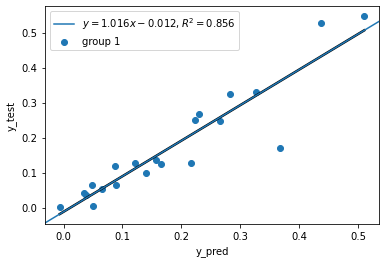

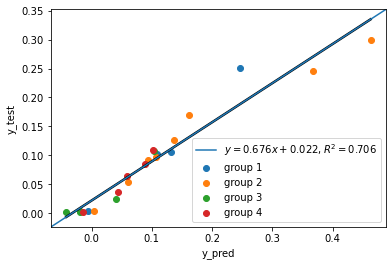

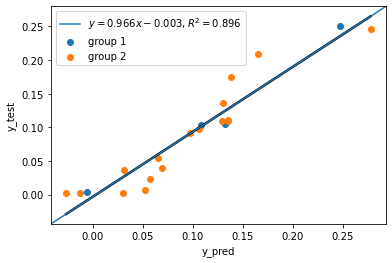

In [18]:
import seaborn as sns
from sklearn.metrics import r2_score

    
def predict(plist):  #input partition list.
    plt.figure()
    plt.xlabel("y_pred")
    plt.ylabel("y_test")
    y_pred_c=[]
    y_test_c=[]
    for i in range(len(plist)):
        print("group: {}".format(i+1))
        X_train=plist[i][0]
        X_test=plist[i][1]
        y_train=plist[i][2]
        y_test=plist[i][3]
        
        pls = PLSRegression(n_components=6)
        pls.fit(X_train, y_train)
        y_pred=pls.predict(X_test).flatten()
        plt.scatter(y_pred,y_test,label="group {}".format(i+1))    
        y_test_c.append(y_test)
        y_pred_c.append(y_pred)
    y_test_c_f = np.array([item for sublist in y_test_c for item in sublist])
    y_pred_c_f=np.array([item for sublist in y_pred_c for item in sublist])
    print(type(y_test_c_f))
    print(type(y_pred_c_f))
    n=len(plist)
    b, a = np.polyfit(y_pred_c_f, y_test_c_f,1)
    b=np.around(b,decimals=3)
    a=np.around(a,decimals=3)

    xseq = np.linspace(np.min(y_pred_c_f),np.max(y_pred_c_f), num=100)
    error = y_test_c_f - y_pred_c_f
    se = np.sum(error**2)
    print('squared error is', se)
  
    mse = se/n 
    print('mean squared error is', mse)
  
    rmse = np.sqrt(mse)
    print('root mean square error is', rmse)
  
    SSt = np.sum((y_test_c_f - np.mean(y_test_c_f))**2)
    R2 = 1- (se/SSt)
    R2=np.around(R2,decimals=3)
    print('R square is', R2)
    plt.plot(xseq, a + b * xseq, color="k", lw=2.5);
    plt.axline(xy1=(0, a), slope=b, label=f'$y = {b}x {a:+}, R^2={R2}$')    
    
    #plot R^2 on graph
    plt.legend()
predict(a)
predict(b)
predict(c)
# print(pls.x_weights_.shape) 
# print(pls.x_loadings_.shape)
# print(pls.x_scores_.shape)

# print(pls.y_weights_.shape)
# print(pls.y_loadings_.shape)
# print(pls.y_scores_.shape)

# print(pls.x_rotations_.shape)
# print(pls.y_rotations_.shape)

# print("coefficients")
# print(pls.coef_.shape)

#can we back calculate the 
print("reconstruction")
# U=pls.x_scores_
# V=pls.x_loadings_
# X_r=U@V.T
# print(X_r.shape)
# print(X_r[:5])
# print(X_train[:5])

# plt.plot(X_r[0])
# U=pls.y_scores_
# Q=pls.y_loadings_
# y_r=U@Q.T
# print(y_r.shape)
# #plt.plot(y_r,label="reconstructed")
# plt.plot(y_train,label="train")
# plt.legend()

#can we get the 'important scores'